In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
IMG_SIZE = 64
BATCH_SIZE = 64
EPOCHS = 100
LR = 0.001


train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

val_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


In [4]:
train_dir = "/content/drive/MyDrive/new_dataset/train"
val_dir   = "/content/drive/MyDrive/new_dataset/val"
test_dir  = "/content/drive/MyDrive/new_dataset/test"

train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=val_transform)

#train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
#val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

from torch.utils.data import DataLoader, WeightedRandomSampler
import numpy as np

targets = [sample[1] for sample in train_dataset.samples]  # class indices
class_sample_counts = np.bincount(targets)
print("Samples per class:", class_sample_counts)


# Compute weights: inverse of class frequency
class_weights = 1.0 / class_sample_counts
print("Class weights:", class_weights)

# Assign weight for each sample in the dataset
sample_weights = [class_weights[t] for t in targets]

# Create sampler
sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),  # draw same number as dataset size
    replacement=True
)

# create DataLoader with sampler instead of shuffle
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    sampler=sampler
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)


class_names = train_dataset.classes
print("Classes:", class_names)

Samples per class: [2150 3475]
Class weights: [0.00046512 0.00028777]
Classes: ['FAKE', 'REAL']


Epoch 1/100: 100%|██████████| 88/88 [14:17<00:00,  9.74s/it]


Epoch 1: Train Loss=0.6821, Val Loss=0.6133, Val Acc=70.17%


Epoch 2/100: 100%|██████████| 88/88 [06:02<00:00,  4.12s/it]


Epoch 2: Train Loss=0.6371, Val Loss=0.5186, Val Acc=72.33%


Epoch 3/100: 100%|██████████| 88/88 [02:55<00:00,  1.99s/it]


Epoch 3: Train Loss=0.5282, Val Loss=0.1690, Val Acc=94.67%


Epoch 4/100: 100%|██████████| 88/88 [01:31<00:00,  1.04s/it]


Epoch 4: Train Loss=0.2969, Val Loss=0.2496, Val Acc=89.83%


Epoch 5/100: 100%|██████████| 88/88 [00:43<00:00,  2.03it/s]


Epoch 5: Train Loss=0.1442, Val Loss=0.0310, Val Acc=99.33%


Epoch 6/100: 100%|██████████| 88/88 [00:29<00:00,  2.98it/s]


Epoch 6: Train Loss=0.0745, Val Loss=0.0019, Val Acc=100.00%


Epoch 7/100: 100%|██████████| 88/88 [00:22<00:00,  3.98it/s]


Epoch 7: Train Loss=0.0593, Val Loss=0.0024, Val Acc=99.83%


Epoch 8/100: 100%|██████████| 88/88 [00:16<00:00,  5.33it/s]


Epoch 8: Train Loss=0.0456, Val Loss=0.0041, Val Acc=100.00%


Epoch 9/100: 100%|██████████| 88/88 [00:16<00:00,  5.45it/s]


Epoch 9: Train Loss=0.0324, Val Loss=0.0005, Val Acc=100.00%


Epoch 10/100: 100%|██████████| 88/88 [00:15<00:00,  5.60it/s]


Epoch 10: Train Loss=0.0363, Val Loss=0.0050, Val Acc=99.83%


Epoch 11/100: 100%|██████████| 88/88 [00:15<00:00,  5.74it/s]


Epoch 11: Train Loss=0.0258, Val Loss=0.0009, Val Acc=100.00%


Epoch 12/100: 100%|██████████| 88/88 [00:15<00:00,  5.65it/s]


Epoch 12: Train Loss=0.0258, Val Loss=0.0031, Val Acc=99.83%


Epoch 13/100: 100%|██████████| 88/88 [00:15<00:00,  5.77it/s]


Epoch 13: Train Loss=0.0170, Val Loss=0.0022, Val Acc=99.83%


Epoch 14/100: 100%|██████████| 88/88 [00:15<00:00,  5.63it/s]


Epoch 14: Train Loss=0.0195, Val Loss=0.0013, Val Acc=99.83%


Epoch 15/100: 100%|██████████| 88/88 [00:14<00:00,  5.87it/s]


Epoch 15: Train Loss=0.0144, Val Loss=0.0051, Val Acc=99.83%


Epoch 16/100: 100%|██████████| 88/88 [00:15<00:00,  5.57it/s]


Epoch 16: Train Loss=0.0095, Val Loss=0.0025, Val Acc=99.83%


Epoch 17/100: 100%|██████████| 88/88 [00:15<00:00,  5.64it/s]


Epoch 17: Train Loss=0.0107, Val Loss=0.0057, Val Acc=99.83%


Epoch 18/100: 100%|██████████| 88/88 [00:15<00:00,  5.79it/s]


Epoch 18: Train Loss=0.0067, Val Loss=0.0004, Val Acc=100.00%


Epoch 19/100: 100%|██████████| 88/88 [00:15<00:00,  5.53it/s]


Epoch 19: Train Loss=0.0152, Val Loss=0.0002, Val Acc=100.00%


Epoch 20/100: 100%|██████████| 88/88 [00:15<00:00,  5.65it/s]


Epoch 20: Train Loss=0.0118, Val Loss=0.0001, Val Acc=100.00%


Epoch 21/100: 100%|██████████| 88/88 [00:15<00:00,  5.71it/s]


Epoch 21: Train Loss=0.0209, Val Loss=0.0004, Val Acc=100.00%


Epoch 22/100: 100%|██████████| 88/88 [00:16<00:00,  5.50it/s]


Epoch 22: Train Loss=0.0096, Val Loss=0.0035, Val Acc=99.83%


Epoch 23/100: 100%|██████████| 88/88 [00:15<00:00,  5.70it/s]


Epoch 23: Train Loss=0.0070, Val Loss=0.0028, Val Acc=99.83%


Epoch 24/100: 100%|██████████| 88/88 [00:15<00:00,  5.74it/s]


Epoch 24: Train Loss=0.0058, Val Loss=0.0003, Val Acc=100.00%


Epoch 25/100: 100%|██████████| 88/88 [00:15<00:00,  5.69it/s]


Epoch 25: Train Loss=0.0151, Val Loss=0.0057, Val Acc=99.83%


Epoch 26/100: 100%|██████████| 88/88 [00:15<00:00,  5.82it/s]


Epoch 26: Train Loss=0.0032, Val Loss=0.0037, Val Acc=99.83%


Epoch 27/100: 100%|██████████| 88/88 [00:15<00:00,  5.64it/s]


Epoch 27: Train Loss=0.0082, Val Loss=0.0043, Val Acc=99.83%


Epoch 28/100: 100%|██████████| 88/88 [00:15<00:00,  5.75it/s]


Epoch 28: Train Loss=0.0115, Val Loss=0.0008, Val Acc=100.00%


Epoch 29/100: 100%|██████████| 88/88 [00:15<00:00,  5.52it/s]


Epoch 29: Train Loss=0.0037, Val Loss=0.0031, Val Acc=99.83%


Epoch 30/100: 100%|██████████| 88/88 [00:15<00:00,  5.75it/s]


Epoch 30: Train Loss=0.0096, Val Loss=0.0061, Val Acc=99.83%


Epoch 31/100: 100%|██████████| 88/88 [00:15<00:00,  5.60it/s]


Epoch 31: Train Loss=0.0065, Val Loss=0.0067, Val Acc=99.83%


Epoch 32/100: 100%|██████████| 88/88 [00:15<00:00,  5.78it/s]


Epoch 32: Train Loss=0.0034, Val Loss=0.0037, Val Acc=99.83%


Epoch 33/100: 100%|██████████| 88/88 [00:15<00:00,  5.73it/s]


Epoch 33: Train Loss=0.0054, Val Loss=0.0066, Val Acc=99.83%


Epoch 34/100: 100%|██████████| 88/88 [00:15<00:00,  5.75it/s]


Epoch 34: Train Loss=0.0075, Val Loss=0.0004, Val Acc=100.00%


Epoch 35/100: 100%|██████████| 88/88 [00:16<00:00,  5.41it/s]


Epoch 35: Train Loss=0.0059, Val Loss=0.0006, Val Acc=100.00%


Epoch 36/100: 100%|██████████| 88/88 [00:15<00:00,  5.73it/s]


Epoch 36: Train Loss=0.0099, Val Loss=0.0017, Val Acc=99.83%


Epoch 37/100: 100%|██████████| 88/88 [00:15<00:00,  5.54it/s]


Epoch 37: Train Loss=0.0030, Val Loss=0.0028, Val Acc=99.83%


Epoch 38/100: 100%|██████████| 88/88 [00:15<00:00,  5.69it/s]


Epoch 38: Train Loss=0.0053, Val Loss=0.0003, Val Acc=100.00%


Epoch 39/100: 100%|██████████| 88/88 [00:15<00:00,  5.81it/s]


Epoch 39: Train Loss=0.0053, Val Loss=0.0051, Val Acc=99.83%


Epoch 40/100: 100%|██████████| 88/88 [00:15<00:00,  5.63it/s]


Epoch 40: Train Loss=0.0049, Val Loss=0.0039, Val Acc=99.83%


Epoch 41/100: 100%|██████████| 88/88 [00:15<00:00,  5.85it/s]


Epoch 41: Train Loss=0.0064, Val Loss=0.0033, Val Acc=99.83%


Epoch 42/100: 100%|██████████| 88/88 [00:15<00:00,  5.77it/s]


Epoch 42: Train Loss=0.0079, Val Loss=0.0045, Val Acc=99.83%


Epoch 43/100: 100%|██████████| 88/88 [00:15<00:00,  5.76it/s]


Epoch 43: Train Loss=0.0031, Val Loss=0.0037, Val Acc=99.83%


Epoch 44/100: 100%|██████████| 88/88 [00:15<00:00,  5.68it/s]


Epoch 44: Train Loss=0.0036, Val Loss=0.0097, Val Acc=99.83%


Epoch 45/100: 100%|██████████| 88/88 [00:16<00:00,  5.42it/s]


Epoch 45: Train Loss=0.0055, Val Loss=0.0004, Val Acc=100.00%


Epoch 46/100: 100%|██████████| 88/88 [00:15<00:00,  5.77it/s]


Epoch 46: Train Loss=0.0019, Val Loss=0.0012, Val Acc=99.83%


Epoch 47/100: 100%|██████████| 88/88 [00:15<00:00,  5.54it/s]


Epoch 47: Train Loss=0.0054, Val Loss=0.0007, Val Acc=100.00%


Epoch 48/100: 100%|██████████| 88/88 [00:15<00:00,  5.66it/s]


Epoch 48: Train Loss=0.0010, Val Loss=0.0020, Val Acc=99.83%


Epoch 49/100: 100%|██████████| 88/88 [00:14<00:00,  5.89it/s]


Epoch 49: Train Loss=0.0114, Val Loss=0.0070, Val Acc=99.83%


Epoch 50/100: 100%|██████████| 88/88 [00:15<00:00,  5.66it/s]


Epoch 50: Train Loss=0.0086, Val Loss=0.0001, Val Acc=100.00%


Epoch 51/100: 100%|██████████| 88/88 [00:15<00:00,  5.66it/s]


Epoch 51: Train Loss=0.0015, Val Loss=0.0020, Val Acc=99.83%


Epoch 52/100: 100%|██████████| 88/88 [00:16<00:00,  5.47it/s]


Epoch 52: Train Loss=0.0051, Val Loss=0.0007, Val Acc=100.00%


Epoch 53/100: 100%|██████████| 88/88 [00:15<00:00,  5.58it/s]


Epoch 53: Train Loss=0.0011, Val Loss=0.0011, Val Acc=99.83%


Epoch 54/100: 100%|██████████| 88/88 [00:15<00:00,  5.55it/s]


Epoch 54: Train Loss=0.0054, Val Loss=0.0033, Val Acc=99.83%


Epoch 55/100: 100%|██████████| 88/88 [00:16<00:00,  5.42it/s]


Epoch 55: Train Loss=0.0037, Val Loss=0.0056, Val Acc=99.83%


Epoch 56/100: 100%|██████████| 88/88 [00:15<00:00,  5.67it/s]


Epoch 56: Train Loss=0.0031, Val Loss=0.0034, Val Acc=99.83%


Epoch 57/100: 100%|██████████| 88/88 [00:16<00:00,  5.47it/s]


Epoch 57: Train Loss=0.0042, Val Loss=0.0004, Val Acc=100.00%


Epoch 58/100: 100%|██████████| 88/88 [00:15<00:00,  5.77it/s]


Epoch 58: Train Loss=0.0018, Val Loss=0.0003, Val Acc=100.00%


Epoch 59/100: 100%|██████████| 88/88 [00:15<00:00,  5.59it/s]


Epoch 59: Train Loss=0.0013, Val Loss=0.0001, Val Acc=100.00%


Epoch 60/100: 100%|██████████| 88/88 [00:15<00:00,  5.74it/s]


Epoch 60: Train Loss=0.0002, Val Loss=0.0001, Val Acc=100.00%


Epoch 61/100: 100%|██████████| 88/88 [00:15<00:00,  5.72it/s]


Epoch 61: Train Loss=0.0001, Val Loss=0.0001, Val Acc=100.00%


Epoch 62/100: 100%|██████████| 88/88 [00:15<00:00,  5.69it/s]


Epoch 62: Train Loss=0.0023, Val Loss=0.0016, Val Acc=99.83%


Epoch 63/100: 100%|██████████| 88/88 [00:15<00:00,  5.72it/s]


Epoch 63: Train Loss=0.0056, Val Loss=0.0001, Val Acc=100.00%


Epoch 64/100: 100%|██████████| 88/88 [00:15<00:00,  5.79it/s]


Epoch 64: Train Loss=0.0089, Val Loss=0.0024, Val Acc=99.83%


Epoch 65/100: 100%|██████████| 88/88 [00:15<00:00,  5.78it/s]


Epoch 65: Train Loss=0.0029, Val Loss=0.0008, Val Acc=100.00%


Epoch 66/100: 100%|██████████| 88/88 [00:15<00:00,  5.79it/s]


Epoch 66: Train Loss=0.0021, Val Loss=0.0001, Val Acc=100.00%


Epoch 67/100: 100%|██████████| 88/88 [00:15<00:00,  5.63it/s]


Epoch 67: Train Loss=0.0013, Val Loss=0.0001, Val Acc=100.00%


Epoch 68/100: 100%|██████████| 88/88 [00:15<00:00,  5.78it/s]


Epoch 68: Train Loss=0.0016, Val Loss=0.0001, Val Acc=100.00%


Epoch 69/100: 100%|██████████| 88/88 [00:15<00:00,  5.69it/s]


Epoch 69: Train Loss=0.0025, Val Loss=0.0016, Val Acc=99.83%


Epoch 70/100: 100%|██████████| 88/88 [00:15<00:00,  5.82it/s]


Epoch 70: Train Loss=0.0309, Val Loss=0.0037, Val Acc=99.83%


Epoch 71/100: 100%|██████████| 88/88 [00:15<00:00,  5.54it/s]


Epoch 71: Train Loss=0.0050, Val Loss=0.0009, Val Acc=100.00%


Epoch 72/100: 100%|██████████| 88/88 [00:16<00:00,  5.45it/s]


Epoch 72: Train Loss=0.0069, Val Loss=0.0011, Val Acc=100.00%


Epoch 73/100: 100%|██████████| 88/88 [00:15<00:00,  5.66it/s]


Epoch 73: Train Loss=0.0045, Val Loss=0.0025, Val Acc=99.83%


Epoch 74/100: 100%|██████████| 88/88 [00:15<00:00,  5.79it/s]


Epoch 74: Train Loss=0.0011, Val Loss=0.0052, Val Acc=99.83%


Epoch 75/100: 100%|██████████| 88/88 [00:16<00:00,  5.49it/s]


Epoch 75: Train Loss=0.0018, Val Loss=0.0018, Val Acc=99.83%


Epoch 76/100: 100%|██████████| 88/88 [00:15<00:00,  5.64it/s]


Epoch 76: Train Loss=0.0022, Val Loss=0.0000, Val Acc=100.00%


Epoch 77/100: 100%|██████████| 88/88 [00:15<00:00,  5.59it/s]


Epoch 77: Train Loss=0.0016, Val Loss=0.0000, Val Acc=100.00%


Epoch 78/100: 100%|██████████| 88/88 [00:15<00:00,  5.73it/s]


Epoch 78: Train Loss=0.0037, Val Loss=0.0002, Val Acc=100.00%


Epoch 79/100: 100%|██████████| 88/88 [00:15<00:00,  5.66it/s]


Epoch 79: Train Loss=0.0037, Val Loss=0.0015, Val Acc=99.83%


Epoch 80/100: 100%|██████████| 88/88 [00:15<00:00,  5.56it/s]


Epoch 80: Train Loss=0.0041, Val Loss=0.0002, Val Acc=100.00%


Epoch 81/100: 100%|██████████| 88/88 [00:15<00:00,  5.70it/s]


Epoch 81: Train Loss=0.0013, Val Loss=0.0002, Val Acc=100.00%


Epoch 82/100: 100%|██████████| 88/88 [00:15<00:00,  5.77it/s]


Epoch 82: Train Loss=0.0013, Val Loss=0.0000, Val Acc=100.00%


Epoch 83/100: 100%|██████████| 88/88 [00:15<00:00,  5.71it/s]


Epoch 83: Train Loss=0.0010, Val Loss=0.0000, Val Acc=100.00%


Epoch 84/100: 100%|██████████| 88/88 [00:15<00:00,  5.63it/s]


Epoch 84: Train Loss=0.0003, Val Loss=0.0000, Val Acc=100.00%


Epoch 85/100: 100%|██████████| 88/88 [00:15<00:00,  5.80it/s]


Epoch 85: Train Loss=0.0025, Val Loss=0.0001, Val Acc=100.00%


Epoch 86/100: 100%|██████████| 88/88 [00:15<00:00,  5.71it/s]


Epoch 86: Train Loss=0.0044, Val Loss=0.0000, Val Acc=100.00%


Epoch 87/100: 100%|██████████| 88/88 [00:15<00:00,  5.86it/s]


Epoch 87: Train Loss=0.0006, Val Loss=0.0000, Val Acc=100.00%


Epoch 88/100: 100%|██████████| 88/88 [00:15<00:00,  5.75it/s]


Epoch 88: Train Loss=0.0003, Val Loss=0.0003, Val Acc=100.00%


Epoch 89/100: 100%|██████████| 88/88 [00:15<00:00,  5.60it/s]


Epoch 89: Train Loss=0.0015, Val Loss=0.0000, Val Acc=100.00%


Epoch 90/100: 100%|██████████| 88/88 [00:15<00:00,  5.79it/s]


Epoch 90: Train Loss=0.0031, Val Loss=0.0009, Val Acc=100.00%


Epoch 91/100: 100%|██████████| 88/88 [00:15<00:00,  5.77it/s]


Epoch 91: Train Loss=0.0171, Val Loss=0.0001, Val Acc=100.00%


Epoch 92/100: 100%|██████████| 88/88 [00:16<00:00,  5.42it/s]


Epoch 92: Train Loss=0.0097, Val Loss=0.0009, Val Acc=100.00%


Epoch 93/100: 100%|██████████| 88/88 [00:16<00:00,  5.44it/s]


Epoch 93: Train Loss=0.0025, Val Loss=0.0014, Val Acc=99.83%


Epoch 94/100: 100%|██████████| 88/88 [00:15<00:00,  5.65it/s]


Epoch 94: Train Loss=0.0010, Val Loss=0.0023, Val Acc=99.83%


Epoch 95/100: 100%|██████████| 88/88 [00:15<00:00,  5.68it/s]


Epoch 95: Train Loss=0.0044, Val Loss=0.0000, Val Acc=100.00%


Epoch 96/100: 100%|██████████| 88/88 [00:15<00:00,  5.54it/s]


Epoch 96: Train Loss=0.0023, Val Loss=0.0002, Val Acc=100.00%


Epoch 97/100: 100%|██████████| 88/88 [00:15<00:00,  5.77it/s]


Epoch 97: Train Loss=0.0039, Val Loss=0.0003, Val Acc=100.00%


Epoch 98/100: 100%|██████████| 88/88 [00:15<00:00,  5.75it/s]


Epoch 98: Train Loss=0.0021, Val Loss=0.0001, Val Acc=100.00%


Epoch 99/100: 100%|██████████| 88/88 [00:15<00:00,  5.54it/s]


Epoch 99: Train Loss=0.0024, Val Loss=0.0001, Val Acc=100.00%


Epoch 100/100: 100%|██████████| 88/88 [00:15<00:00,  5.59it/s]


Epoch 100: Train Loss=0.0021, Val Loss=0.0000, Val Acc=100.00%


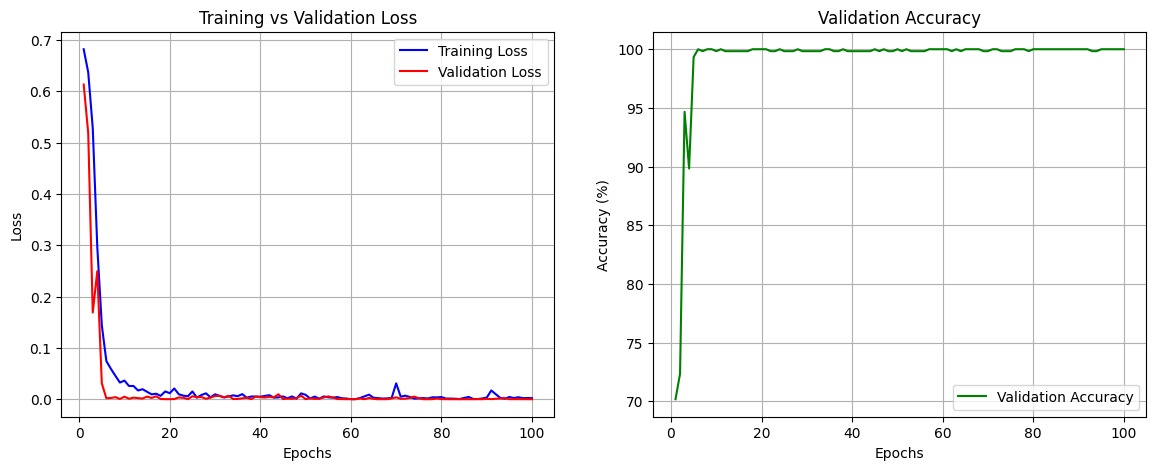

Test Image: /content/drive/MyDrive/new_dataset/test/P1.jpeg
Predicted: REAL
Test Image: /content/drive/MyDrive/new_dataset/test/P2.jpeg
Predicted: REAL
Test Image: /content/drive/MyDrive/new_dataset/test/P3.jpeg
Predicted: REAL
Test Image: /content/drive/MyDrive/new_dataset/test/P4.jpeg
Predicted: REAL
Test Image: /content/drive/MyDrive/new_dataset/test/P5.jpeg
Predicted: REAL
Test Image: /content/drive/MyDrive/new_dataset/test/P6.jpeg
Predicted: REAL
Test Image: /content/drive/MyDrive/new_dataset/test/P7.jpeg
Predicted: REAL
Test Image: /content/drive/MyDrive/new_dataset/test/P8.jpeg
Predicted: REAL
Test Image: /content/drive/MyDrive/new_dataset/test/P9.jpeg
Predicted: REAL
Test Image: /content/drive/MyDrive/new_dataset/test/P10.jpeg
Predicted: REAL
Test Image: /content/drive/MyDrive/new_dataset/test/P11.jpeg
Predicted: REAL
Test Image: /content/drive/MyDrive/new_dataset/test/P12.jpeg
Predicted: REAL
Test Image: /content/drive/MyDrive/new_dataset/test/P13.jpeg
Predicted: REAL
Test Ima

In [5]:
'''
class ConvBlock(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
    def forward(self, x):
        return self.block(x)

class SmallCNN64(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            ConvBlock(1, 32),
            ConvBlock(32, 64),
            ConvBlock(64, 128),
            ConvBlock(128, 256),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * (IMG_SIZE // 16) * (IMG_SIZE // 16), 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)
'''

class ConvBlock(nn.Module):
    def __init__(self, in_ch, out_ch, dropout=0.3):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.SiLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.SiLU(inplace=True),
            nn.Dropout2d(dropout),
            nn.MaxPool2d(2)
        )

    def forward(self, x):
        return self.block(x)

class SmallCNN64(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            ConvBlock(1, 32),
            ConvBlock(32, 64),
            ConvBlock(64, 128),
            ConvBlock(128, 256),
        )
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1,1)),   # GAP
            nn.Flatten(),
            nn.Linear(256, 512),
            nn.SiLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SmallCNN64(num_classes=len(class_names)).to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
scaler = torch.amp.GradScaler("cuda", enabled=torch.cuda.is_available())


def train_model(model, train_loader, val_loader, epochs=EPOCHS):
    train_losses, val_losses, val_accs = [], [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            with torch.amp.autocast("cuda", enabled=torch.cuda.is_available()):
                outputs = model(images)
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        correct, total, val_loss = 0, 0, 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        val_acc = 100 * correct / total
        val_accs.append(val_acc)

        print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.4f}, "
              f"Val Loss={avg_val_loss:.4f}, Val Acc={val_acc:.2f}%")

    return train_losses, val_losses, val_accs


import matplotlib.pyplot as plt

def plot_training(train_losses, val_losses, val_accs):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(14,5))

    # Plot Loss
    plt.subplot(1,2,1)
    plt.plot(epochs, train_losses, 'b-', label="Training Loss")
    plt.plot(epochs, val_losses, 'r-', label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(1,2,2)
    plt.plot(epochs, val_accs, 'g-', label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Validation Accuracy")
    plt.legend()
    plt.grid(True)

    plt.show()

# Call it after training



train_losses, val_losses, val_accs = train_model(model, train_loader, val_loader, epochs=EPOCHS)
plot_training(train_losses, val_losses, val_accs)

def predict_image(image_path, model, class_names):
    model.eval()
    img = Image.open(image_path).convert("L")
    transform = val_transform
    img_t = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img_t)
        _, predicted = outputs.max(1)

    return class_names[predicted.item()]

TP = 0
FP = 0
TN = 0
FN = 0

for filename in os.listdir(test_dir):
    test_img = os.path.join(test_dir, filename)
    print("Test Image:", test_img)
    predicted = predict_image(test_img, model, class_names)
    print("Predicted:", predicted)
    if "label" in filename:
      if predicted == "FAKE":
        TN += 1
      else:
        FP += 1
    if "P" in filename:
      if predicted == "REAL":
        TP += 1
      else:
        FN += 1
'''
count = 1
for filename in os.listdir(test_dir):
    test_img = os.path.join(test_dir, filename)
    print("Test Image:", test_img)
    predicted = predict_image(test_img, model, class_names)
    print("Predicted:", predicted)
    if count < 51:
      if predicted == "NORMAL":
        TN += 1
      else:
        FP += 1
    if count >= 51:
      if predicted == "PNEUMONIA":
        TP += 1
      else:
        FN += 1
    count += 1
'''
print("TP:", TP)
print("FP:", FP)
print("TN:", TN)
print("FN:", FN)





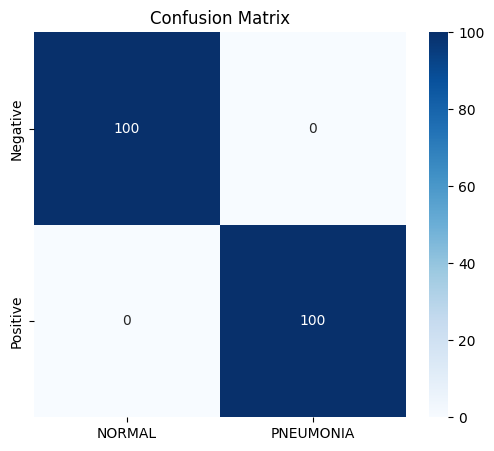

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

conf_matrix = np.array([[TN, FP],
                        [FN, TP]])

# Labels
labels = ["Negative", "Positive"]
classes = ["NORMAL","PNEUMONIA"]
# Plot with seaborn
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=labels)


plt.title("Confusion Matrix")
plt.show()
torch.save(model.state_dict(), "cnn_model.pth")


In [7]:
import math

accuracy  = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) else 0
recall    = TP / (TP + FN) if (TP + FN) else 0
specificity = TN / (TN + FP) if (TN + FP) else 0
fpr       = FP / (FP + TN) if (FP + TN) else 0
fnr       = FN / (FN + TP) if (FN + TP) else 0
npv       = TN / (TN + FN) if (TN + FN) else 0
f1        = 2 * precision * recall / (precision + recall) if (precision + recall) else 0
balanced_accuracy = (recall + specificity) / 2
mcc_num   = (TP*TN - FP*FN)
mcc_den   = math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
mcc       = mcc_num / mcc_den if mcc_den else 0

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1)
print("Balanced Accuracy:", balanced_accuracy)
print("MCC:", mcc)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Balanced Accuracy: 1.0
MCC: 1.0


In [8]:
import gradio as gr


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SmallCNN64(num_classes=len(class_names)).to(device)
model.load_state_dict(torch.load("cnn_model.pth", map_location=device))
model.eval()

# Transform cho inference (không dùng augmentation)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

def classify_image(img):
    img = img.convert("L")   # giữ grayscale
    img = transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(img)
        _, predicted = outputs.max(1)   # lấy index class có giá trị cao nhất
    return class_names[predicted.item()]

interface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs="label",
    title="Chest X-ray Classification",
    description="Upload an X-ray image to classify (REAL,FAKE)"
)

interface.launch(share=True)



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://14cca4398678ce7a72.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
